# Crimes in Russia from 2003 to 2020 analysis 

In this project I'll work with a dataset cointaining crimes committed in Russia from 2003 to 2020. The data is provided per month and it is sorted into multiple columns with different types of crime.

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar

df = pd.read_csv("crime.csv")

Check if there are empty or "NaN" cells in the dataset:

In [106]:
df.isna().sum()

month             0
Total_crimes      0
Serious           0
Huge_damage       0
Ecological        0
Terrorism         0
Extremism         0
Murder            0
Harm_to_health    0
Rape              0
Theft             0
Vehicle_theft     0
Fraud_scam        0
Hooligan          0
Drugs             0
Weapons           0
dtype: int64

Check that data type is correct per column (in particular, for each column with numbers there are no cells with numbers written not in int/float (no '1M' instead of 1000000 etc.)):

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           205 non-null    object 
 1   Total_crimes    205 non-null    float64
 2   Serious         205 non-null    float64
 3   Huge_damage     205 non-null    float64
 4   Ecological      205 non-null    float64
 5   Terrorism       205 non-null    float64
 6   Extremism       205 non-null    float64
 7   Murder          205 non-null    float64
 8   Harm_to_health  205 non-null    float64
 9   Rape            205 non-null    float64
 10  Theft           205 non-null    float64
 11  Vehicle_theft   205 non-null    float64
 12  Fraud_scam      205 non-null    float64
 13  Hooligan        205 non-null    float64
 14  Drugs           205 non-null    float64
 15  Weapons         205 non-null    float64
dtypes: float64(15), object(1)
memory usage: 25.8+ KB


Before starting to work on the dataset, I'd like to note that number of total crimes != sum of all types, as types of crimes may intersect:

In [108]:
df_sum = df.drop("month", axis=1).sum()
int(df.Total_crimes.sum() - df_sum.drop("Total_crimes", axis=0).sum())

-3666655

After making sure that data is clean, let's look at the general trend of the dataset: number of total crimes (some descriptive statistics and a plot to visualise the data).
As obtained numbers will show the mean/median/standart deviation of crimes, I will take integer part of them (for better understanding, as crimes cannot be float).

In [109]:
int(df.Total_crimes.mean())

221279

In [110]:
int(df.Total_crimes.median())

207550

In [111]:
int(df.Total_crimes.std())

51720

Per year for the whole time presented in the dataset:

As at the moment there is no column specifically with years, let's create one (using month column):

In [112]:
df["year"] = df["month"].apply(lambda item: item[-4:])
df

,month,Total_crimes,Serious,Huge_damage,Ecological,Terrorism,Extremism,Murder,Harm_to_health,Rape,Theft,Vehicle_theft,Fraud_scam,Hooligan,Drugs,Weapons,year
0,01.01.2003,214587.0,88203.0,20162.0,1216.0,630.0,13.0,2749.0,5559.0,574.0,81014.0,3549.0,7731.0,10560.0,16006.0,4661.0,2003
1,01.02.2003,221928.0,88863.0,20889.0,1701.0,678.0,5.0,2444.0,4732.0,515.0,95970.0,3697.0,7607.0,10816.0,16839.0,5364.0,2003
2,01.03.2003,248452.0,101349.0,24053.0,1817.0,809.0,10.0,2864.0,4851.0,560.0,79420.0,4327.0,9437.0,11813.0,20176.0,5938.0,2003
3,01.04.2003,236299.0,91625.0,19754.0,2449.0,892.0,10.0,2919.0,4722.0,668.0,95215.0,5345.0,7824.0,12636.0,16614.0,5230.0,2003
4,01.05.2003,230931.0,89615.0,17519.0,3530.0,796.0,20.0,2713.0,4895.0,688.0,94505.0,6374.0,7122.0,12234.0,14413.0,5112.0,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,01.09.2019,166208.0,38967.0,64283.0,1858.0,122.0,48.0,555.0,1570.0,306.0,67006.0,1903.0,21557.0,155.0,15100.0,1945.0,2019
201,01.10.2019,199038.0,53319.0,81775.0,2322.0,111.0,52.0,668.0,1846.0,223.0,81053.0,2197.0,27980.0,180.0,20510.0,1744.0,2019
202,01.11.2019,148104.0,31652.0,49623.0,1581.0,149.0,27.0,622.0,1467.0,246.0,57434.0,1344.0,19794.0,132.0,11067.0,1742.0,2019
203,01.12.2019,155512.0,38470.0,60742.0,1526.0,164.0,52.0,534.0,1644.0,134.0,63327.0,1374.0,22588.0,155.0,13451.0,1754.0,2019


Now, sum statistics (for each cloumn) for 12 months of each year:

Notice that there is only January in 2020 statistics, therefore, to obtain valid data, we should either exclude 2020 from per year sum statistics or multiply January results by 12 (months) -- which, of course, would be an assumption and might not correspond with season dependent tendencies and, consequently, will not be the strategy here (so let's exclude 2020 from per year statistics).
From the dataset (printed above): year 2020 (January) = row (index) 204

In [113]:
df_yearly = df.drop("month", axis=1).drop(204, axis=0).groupby(["year"]).sum()
df_yearly

,Total_crimes,Serious,Huge_damage,Ecological,Terrorism,Extremism,Murder,Harm_to_health,Rape,Theft,Vehicle_theft,Fraud_scam,Hooligan,Drugs,Weapons
year,,,,,,,,,,,,,,,
2003,2756398.0,1080151.0,221379.0,26097.0,8664.0,157.0,31360.0,57087.0,8085.0,1150772.0,70529.0,87471.0,134052.0,181688.0,54203.0
2004,2893810.0,936804.0,193533.0,30753.0,9523.0,130.0,31552.0,57352.0,8795.0,1276880.0,71164.0,126047.0,24798.0,150096.0,28446.0
2005,3554738.0,1076988.0,208976.0,33491.0,5438.0,152.0,30849.0,57863.0,9222.0,1572996.0,67546.0,179553.0,28665.0,175241.0,29908.0
2006,3855373.0,1074501.0,269471.0,41883.0,1781.0,263.0,27462.0,51429.0,8871.0,1676983.0,64535.0,225326.0,28645.0,212019.0,30055.0
2007,3582541.0,961133.0,298440.0,41242.0,759.0,356.0,22227.0,47348.0,7038.0,1566970.0,58427.0,211277.0,20360.0,231218.0,30223.0
2008,3209862.0,851392.0,312093.0,44883.0,642.0,460.0,20056.0,45436.0,6208.0,1326342.0,52820.0,192490.0,13589.0,232613.0,31733.0
2009,2994820.0,796224.0,314990.0,46607.0,654.0,548.0,17681.0,43112.0,5398.0,1188574.0,49288.0,188723.0,9474.0,238523.0,34249.0
2010,2628799.0,684347.0,290018.0,39155.0,581.0,656.0,15563.0,39745.0,4907.0,1108369.0,47587.0,160081.0,7219.0,222564.0,30428.0
2011,2404807.0,607507.0,291089.0,29151.0,622.0,619.0,14305.0,38512.0,4801.0,1038566.0,50279.0,147468.0,5635.0,215214.0,28134.0


Total crimes per year statistics:

In [114]:
int(df_yearly.Total_crimes.mean())

2659001

In [115]:
int(df_yearly.Total_crimes.median())

2404807

In [116]:
int(df_yearly.Total_crimes.std())

597690

Now, after calculating some general variables for total crimes data, let's visualize the information.
The data from this column will be presented as number of crimes over time with an illustration of mean as a horizontal line on the graph.

Let's first do it for data per month.

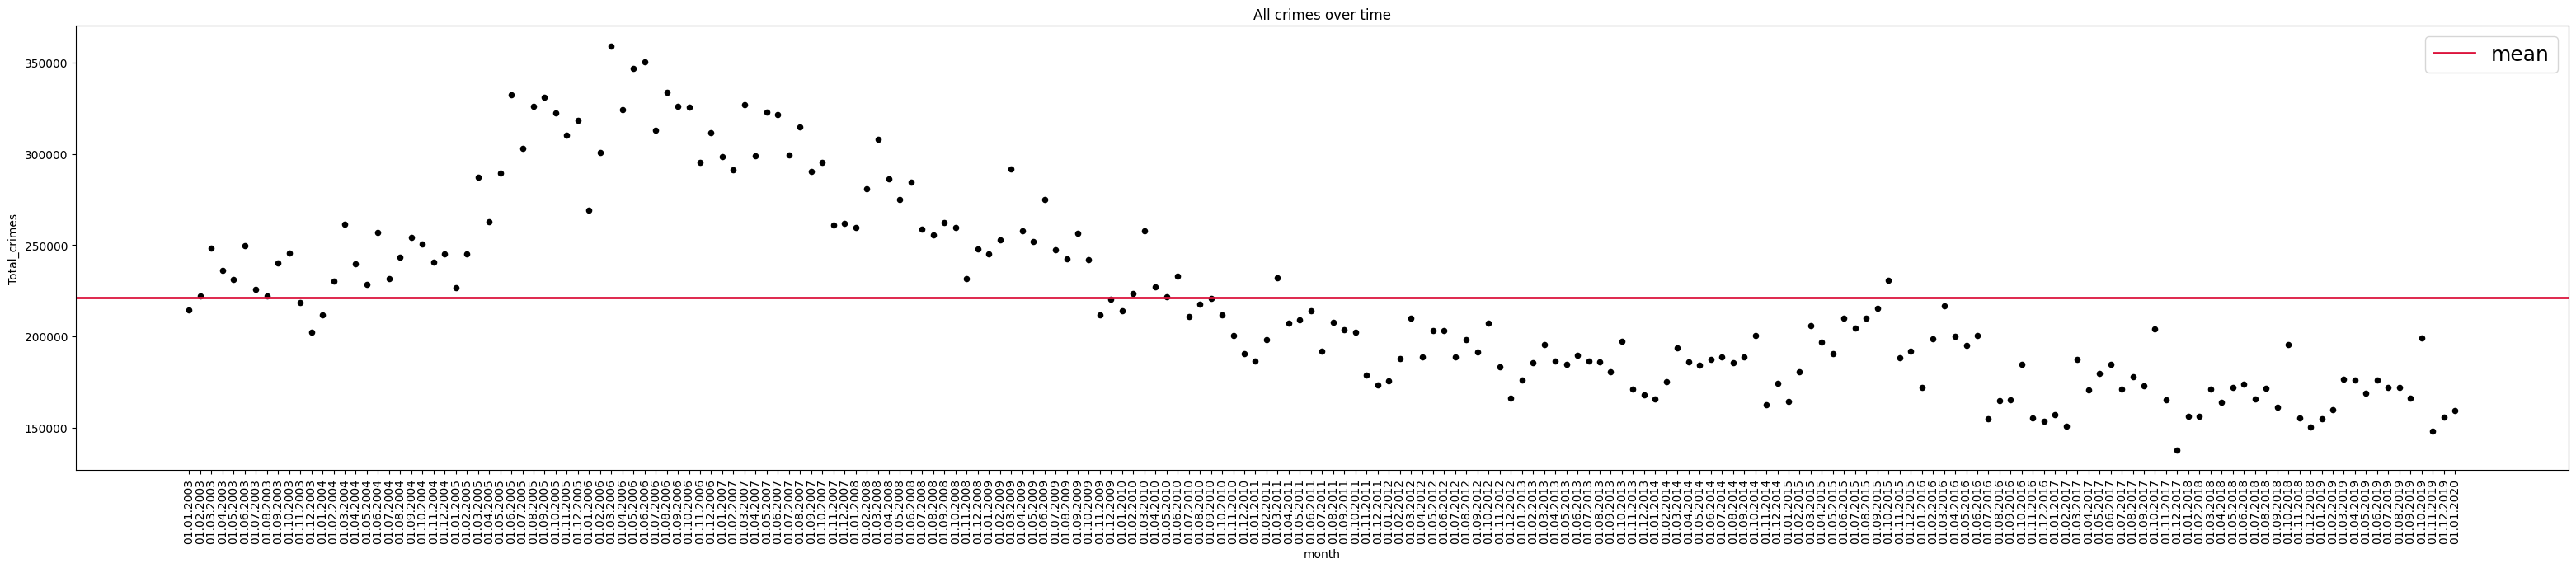

In [117]:
df.plot(kind = "scatter", x="month", y="Total_crimes", figsize=(39, 7), rot=90, color="black", title="All crimes over time")
plt.axhline(y = int(df.Total_crimes.mean()), color="crimson", label="mean", linewidth=2)
plt.legend(fontsize="18")

Now, per year:

In [118]:
df_yearly.index = df_yearly.index.astype(int)
xticks=range(df_yearly.index.min(), df_yearly.index.max() + 1)

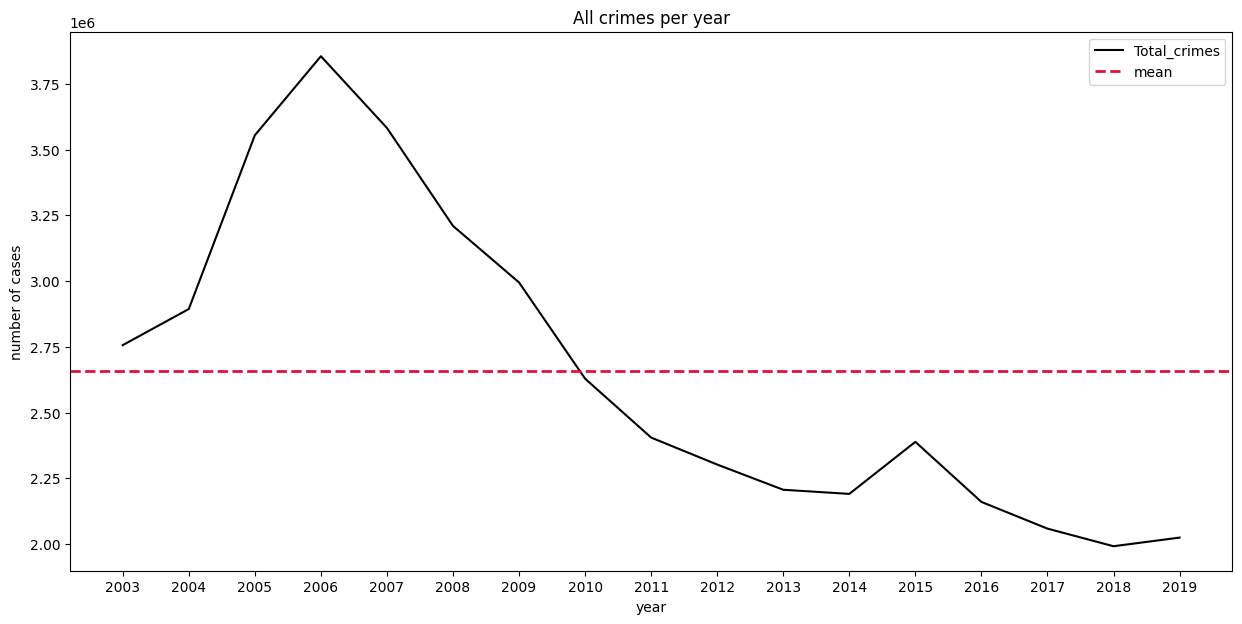

In [119]:
df_yearly["Total_crimes"].plot(figsize=(15,7), xticks=xticks, color="black", ylabel="number of cases", title="All crimes per year")
plt.axhline(y = int(df_yearly.Total_crimes.mean()), color="crimson", label="mean", linewidth=2, ls="--")
plt.legend()

The crime rate rises from 2003 to 2006 and declines after with a slight rise for 2015 and an even smaller rise for 2019. It is possible to say that the trend is downward as the number of cases in 2003 is higher than in 2019.

Note that it's not possible to put all months of all the years on x axis (written on the plot). Also notice that the per year graph represents the general trend (shown on per month graph as well) but doesn't illustrate yearly fluctuations, which, as can be concluded from comparing per year and per month plots, is not needed to be presented to understand the trend.

So, all further time dependent plots will have years as x axis as it will provide essential information and not overload the plot with details.

We obtained a tendency in the amount of all crimes committed from 2003 to 2019. I think that while the general trend is such, it is not true for some particular types of crimes.
As an example, let's analyse fraud. Assumption: on the contrary to the general trend, the number of scams has significantly grown during these years.

In [120]:
int(df.Fraud_scam.mean())

15277

In [121]:
int(df.Fraud_scam.median())

15303

In [122]:
int(df.Fraud_scam.std())

4114

In [123]:
int(df_yearly.Fraud_scam.mean())

182927

In [124]:
int(df_yearly.Fraud_scam.median())

188723

In [125]:
int(df_yearly.Fraud_scam.std())

41288

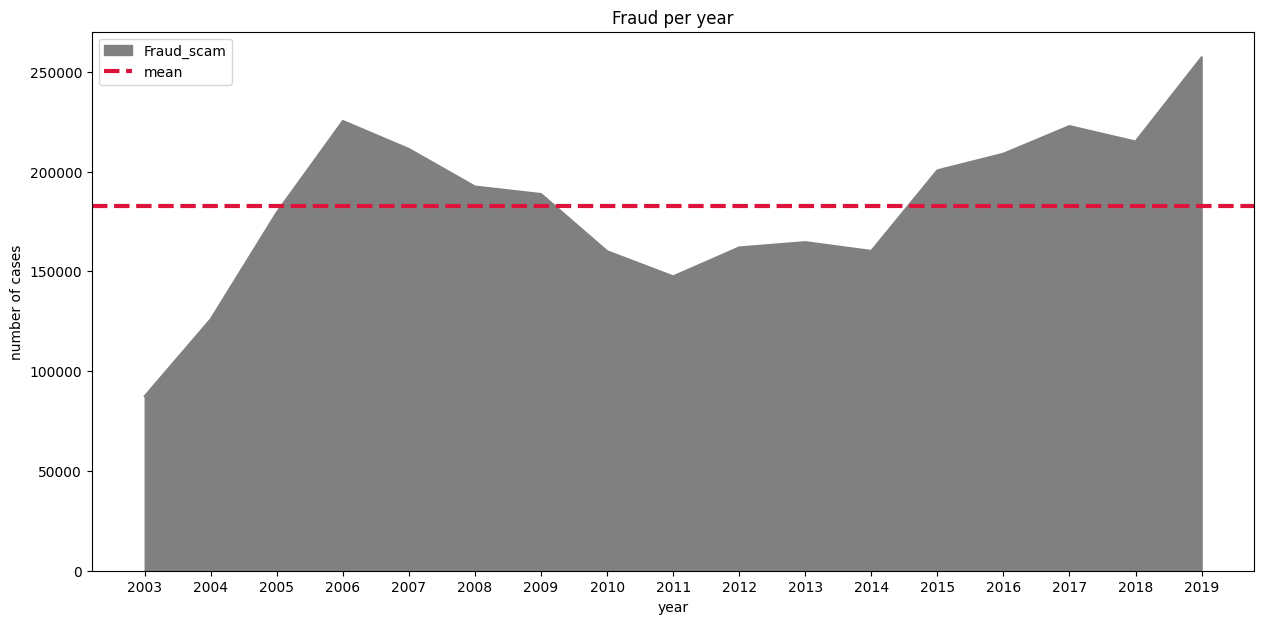

In [126]:
df_yearly["Fraud_scam"].plot.area(figsize=(15,7), xticks=xticks, color="gray", ylabel="number of cases", title="Fraud per year")
plt.axhline(y = int(df_yearly.Fraud_scam.mean()), color="crimson", label="mean", linewidth=3, ls="--")
plt.legend()

On the graph we can see an overall rise of fraud from 2003 to 2019 with a peak in 2006 (or, we can say, a drop from 2006 to 2017). So the assumption was true.

Let's now see whether the discovered trend for all crimes applies to serious crimes. Firstly, on the whole. 

In [127]:
int(df.Serious.mean())

59068

In [128]:
int(df.Serious.median())

51426

In [129]:
int(df.Serious.std())

20501

In [130]:
serious_mean = int(df_yearly.Serious.mean())
serious_mean

709700

In [131]:
serious_median = int(df_yearly.Serious.median())
serious_median

607507

In [132]:
serious_std = int(df_yearly.Serious.std())
serious_std

240868

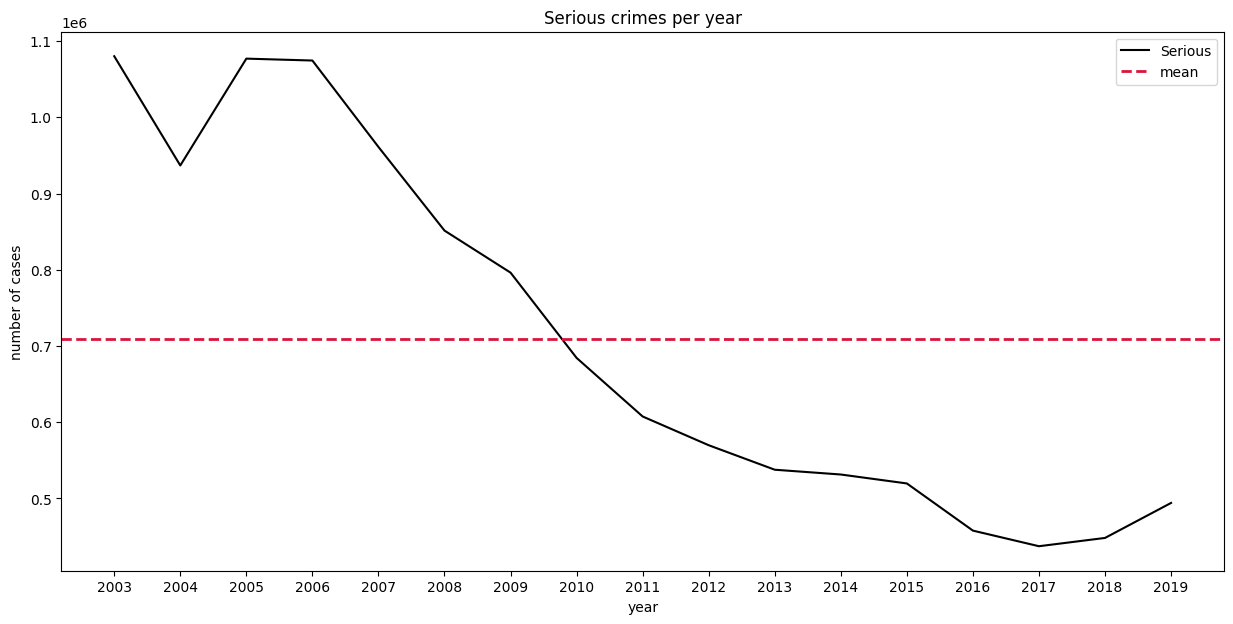

In [133]:
df_yearly["Serious"].plot(figsize=(15,7), xticks=xticks, color="black", ylabel="number of cases", title="Serious crimes per year")
plt.axhline(y = int(df_yearly.Serious.mean()), color="crimson", label="mean", linewidth=2, ls="--")
plt.legend()

The number of serious crimes generally declines from 2003 to 2019. There is no peak in 2006 like for all crimes but there is a drop in 2004  and in 2005 the figure bounces back to nearly (*) 2003 value.

In [134]:
#*
int(df_yearly.Serious[2003]), int(df_yearly.Serious[2005])

(1080151, 1076988)

Secondly, for some particular types of serious crime, such as murder, crime causing serious harm to health (drievous bodily harm) and rape.
To compare the data, let's illustrate it on one graph. For a fuller picture, I'll also add data on all serious crimes and on all crimes. For better comparison, I'll use not numbers but percentage (of cases of each type of crime per year out of all cases of according type from 2003 to 2019).

Proportions:

In [135]:
# In general what percantage are serious crimes out of all:
def round_percentage(number, total):
    return float(np.round(number / total * 100, decimals=2))
crimes = int(df_yearly.Total_crimes.sum())
serious = int(df_yearly.Serious.sum())
round_percentage(serious, crimes)

26.69

In [136]:
# Murder, causing harm to health and rape out of serious:
murder = int(df_yearly.Murder.sum())
harm_to_health = int(df_yearly.Harm_to_health.sum())
rape = int(df_yearly.Rape.sum())
print(round_percentage(murder, serious), round_percentage(harm_to_health, serious), round_percentage(rape, serious))

2.46 5.55 0.79


Now, the plot:

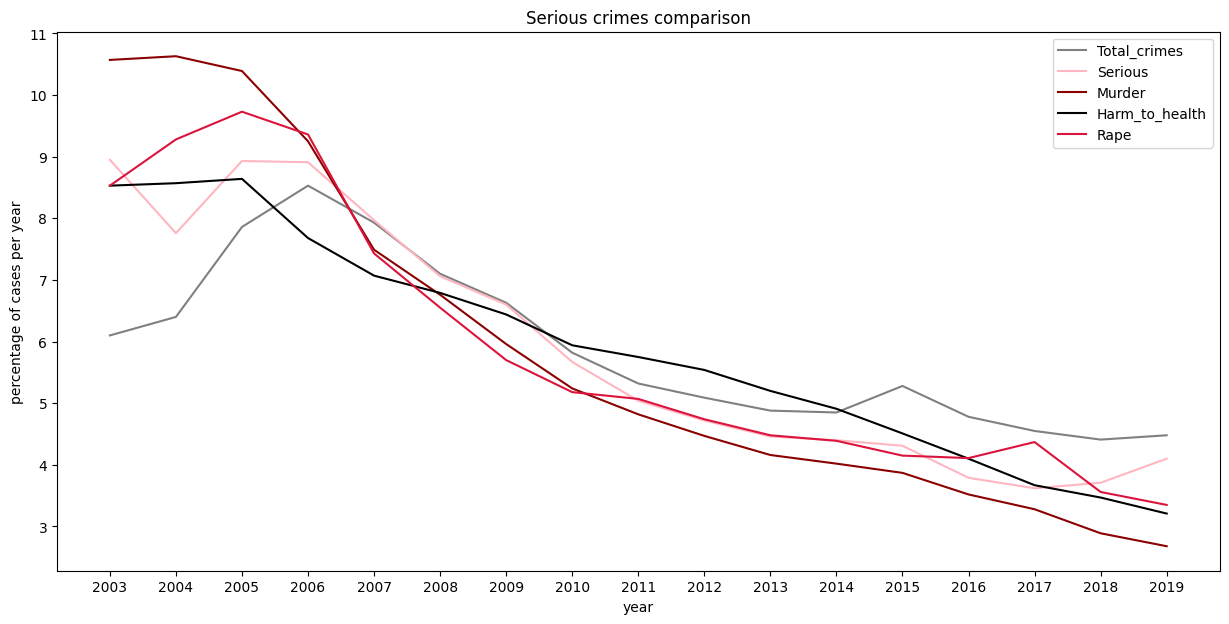

In [137]:
def year_percentage(column):
    return column.apply(lambda row: round_percentage(row, int(column.sum())))

year_percentage(df_yearly["Total_crimes"]).plot(figsize=(15,7), xticks=xticks, color="gray", ylabel="percentage of cases per year", title="Serious crimes comparison")
year_percentage(df_yearly["Serious"]).plot(figsize=(15,7), xticks=xticks, color="lightpink")
year_percentage(df_yearly["Murder"]).plot(figsize=(15,7), xticks=xticks, color="darkred")
year_percentage(df_yearly["Harm_to_health"]).plot(figsize=(15,7), xticks=xticks, color="black")
year_percentage(df_yearly["Rape"]).plot(figsize=(15,7), xticks=xticks, color="crimson")
plt.legend()
# line graph for better illustration, bar chart more convenient for description of trends

In [138]:
list_to_plot = [year_percentage(df_yearly["Total_crimes"]), year_percentage(df_yearly["Serious"]), year_percentage(df_yearly["Murder"]),year_percentage(df_yearly["Harm_to_health"]), year_percentage(df_yearly["Rape"])]
df_percent = pd.concat(list_to_plot, axis=1)

<Axes: title={'center': 'Serious crimes comparison'}, xlabel='year', ylabel='percentage of cases per year'>

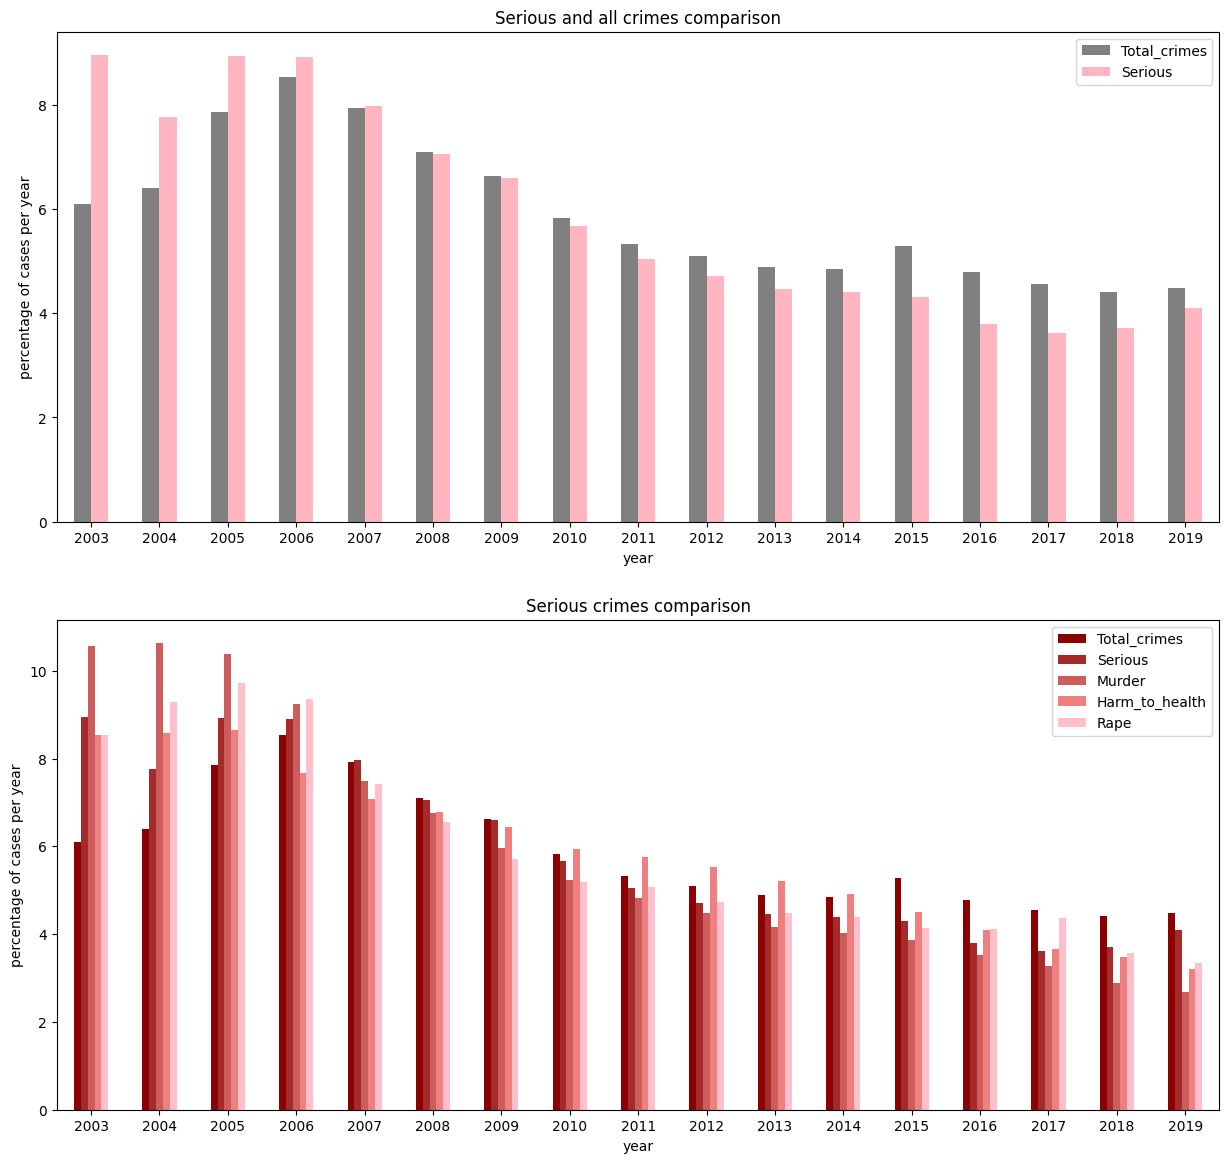

In [139]:
fig, axes = plt.subplots(nrows=2, figsize=(15, 14))
df_percent.plot.bar(ax = axes[0], y = ["Total_crimes", "Serious"], color=["gray", "lightpink"], rot=0, ylabel="percentage of cases per year", title="Serious and all crimes comparison")
df_percent.plot.bar(ax = axes[1], y = ["Total_crimes", "Serious", "Murder", "Harm_to_health", "Rape"], rot=0, color=["darkred", "brown", "indianred", "lightcoral", "pink"], ylabel="percentage of cases per year", title="Serious crimes comparison")

From year 2015 the per year percentage of all crimes stays the highest (from 2010 -- higher than serious in total). This means that the relative amount of serious crimes (on the whole and for each illustrated type) has lowered more than crimes have in general. At the same time, less crimes out af all committed from 2003 to 2019 were committed from 2003 to 2007 than serious (out of all serious from 2003 to 2009) were committed in that period of time: the darkest column is lower than others from 2003 to 2007. So the 2006 peak in all crimes was created not by serious crimes, except for maybe rape (the only peaking in 2006 here, but its percantage out of all is too small to cause the peak for all crimes*). So serious crimes have approximately the same tendency as crimes on the whole from 2007 to 2015.
The most drastic decline was in murder (the middle in color chart): from the highest of all in percentage to the lowest. A slight drop of serious crimes in 2004 was not a decrease in murder, rape or causing serious harm to health crimes (there is drop in the column for serious crimes and no drop in murder, rape or causing serious harm to health crimes).

In [140]:
#*
round_percentage(rape, crimes) 

0.21

Let's then compare all crimes and ones not considered major. To obtain such statistics, I'll substract serious from total (so it will approximately (due to the possible intersection) be "non-serious", minor).

In [141]:
df["Minor"] = df["Total_crimes"] - df["Serious"]
df_yearly["Minor"] = df_yearly["Total_crimes"] - df_yearly["Serious"]
df_yearly

,Total_crimes,Serious,Huge_damage,Ecological,Terrorism,Extremism,Murder,Harm_to_health,Rape,Theft,Vehicle_theft,Fraud_scam,Hooligan,Drugs,Weapons,Minor
year,,,,,,,,,,,,,,,,
2003,2756398.0,1080151.0,221379.0,26097.0,8664.0,157.0,31360.0,57087.0,8085.0,1150772.0,70529.0,87471.0,134052.0,181688.0,54203.0,1676247.0
2004,2893810.0,936804.0,193533.0,30753.0,9523.0,130.0,31552.0,57352.0,8795.0,1276880.0,71164.0,126047.0,24798.0,150096.0,28446.0,1957006.0
2005,3554738.0,1076988.0,208976.0,33491.0,5438.0,152.0,30849.0,57863.0,9222.0,1572996.0,67546.0,179553.0,28665.0,175241.0,29908.0,2477750.0
2006,3855373.0,1074501.0,269471.0,41883.0,1781.0,263.0,27462.0,51429.0,8871.0,1676983.0,64535.0,225326.0,28645.0,212019.0,30055.0,2780872.0
2007,3582541.0,961133.0,298440.0,41242.0,759.0,356.0,22227.0,47348.0,7038.0,1566970.0,58427.0,211277.0,20360.0,231218.0,30223.0,2621408.0
2008,3209862.0,851392.0,312093.0,44883.0,642.0,460.0,20056.0,45436.0,6208.0,1326342.0,52820.0,192490.0,13589.0,232613.0,31733.0,2358470.0
2009,2994820.0,796224.0,314990.0,46607.0,654.0,548.0,17681.0,43112.0,5398.0,1188574.0,49288.0,188723.0,9474.0,238523.0,34249.0,2198596.0
2010,2628799.0,684347.0,290018.0,39155.0,581.0,656.0,15563.0,39745.0,4907.0,1108369.0,47587.0,160081.0,7219.0,222564.0,30428.0,1944452.0
2011,2404807.0,607507.0,291089.0,29151.0,622.0,619.0,14305.0,38512.0,4801.0,1038566.0,50279.0,147468.0,5635.0,215214.0,28134.0,1797300.0


Proportion:

In [142]:
minor = int(df_yearly.Minor.sum())
round_percentage(minor, crimes)

73.31

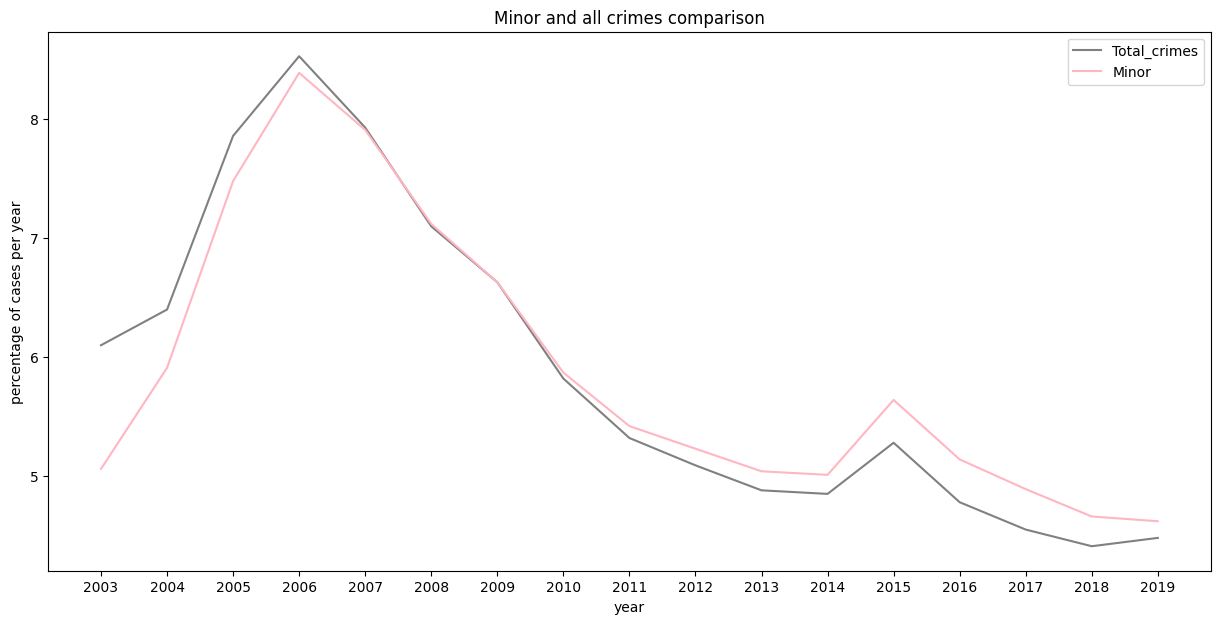

In [143]:
year_percentage(df_yearly["Total_crimes"]).plot(figsize=(15,7), xticks=xticks, color="gray", ylabel="percentage of cases per year", title="Minor and all crimes comparison")
year_percentage(df_yearly["Minor"]).plot(figsize=(15,7), xticks=xticks, color="lightpink")
plt.legend()

<Axes: title={'center': 'Minor and all crimes comparison'}, xlabel='year', ylabel='percentage of cases per year'>

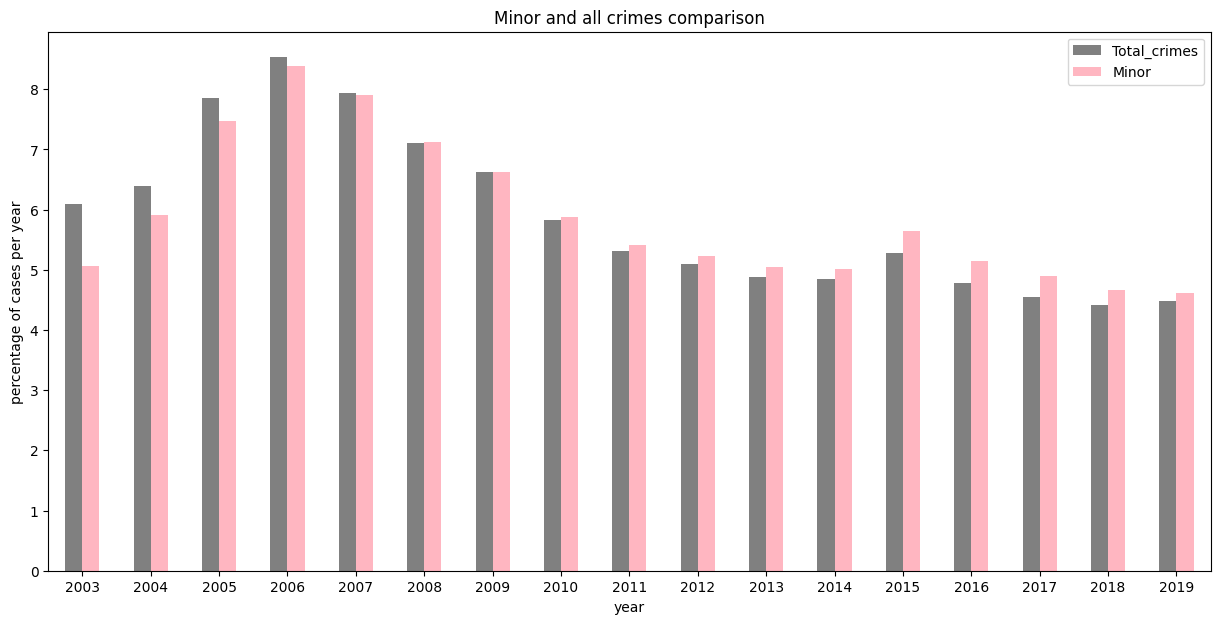

In [144]:
df_percent["Minor"] = year_percentage(df_yearly["Minor"])
df_percent.plot.bar(y=["Total_crimes", "Minor"], figsize=(15, 7), color=["gray", "lightpink"], rot=0, ylabel="percentage of cases per year", title="Minor and all crimes comparison")

Being the major part of crimes in total (73.31%), crimes not considered serious in the dataset follow the same trend as crimes on the whole, the peak in 2006 included. We can notice that from 2010 bigger percentages of non-serious crimes out of all non-serious (from 2003 to 2019) are commited per year than the percentages of crimes in total out of all crimes committed (minor column higher than total). The opposite is true for 2003-2007.
This verifies information from previous plots.

Now I'll try to analyse fluctuations depending on the month of the year (seasonal).

Here, hypothesis: the amount of rape is higher in colder season than in warmer season each year.

Firstly, let's look at statistics for each month:

In [145]:
# Transform months in the dataset from object type to datetime type in order to further make ticks by years
df["month"] = pd.to_datetime(df["month"], dayfirst=True)

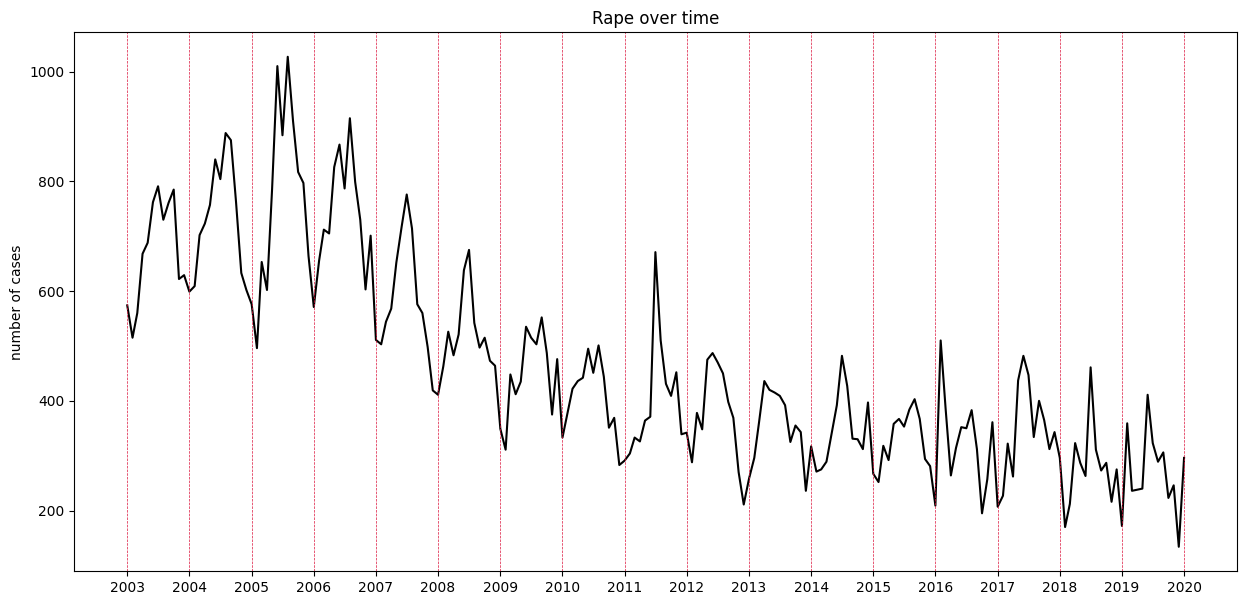

In [146]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 7)
ax.plot(df["month"], df["Rape"], color="black")
ax.set_title("Rape over time")
ax.set_ylabel("number of cases")
ax.xaxis.set_major_locator(mdates.YearLocator())
for i in range(0, 205, 12):
    ax.axvline(x=df.month[i], ymin=0, ymax=1, color="crimson", linewidth=0.5, ls="--")

Each yearly fluctuation peaks in the middle of the year, so nearly each year the quantity of the crime is the lowest closer to the start and to the end and the highest in the middle, so is lower around January and higher around July. Although the general tendency is such, there are a few exceptions: the highest number of 2016 is in the beginning of the year; 2016 also has a peak nearer its end; 2019 has a rise at the beginning (though the figure is still not as high as in the middle); 2019 ends with an increase; in 2005 and 2006 there is a drop (with immediate rise) in the middle of the year.

Let's then calculate average statistic for each month:

I'll create a column specifically for months, then group the data by month and create a "seasonal" dataset:

In [147]:
df["month_only"] = df["month"].apply(lambda item: item.strftime("%b"))
df

,month,Total_crimes,Serious,Huge_damage,Ecological,Terrorism,Extremism,Murder,Harm_to_health,Rape,Theft,Vehicle_theft,Fraud_scam,Hooligan,Drugs,Weapons,year,Minor,month_only
0,2003-01-01,214587.0,88203.0,20162.0,1216.0,630.0,13.0,2749.0,5559.0,574.0,81014.0,3549.0,7731.0,10560.0,16006.0,4661.0,2003,126384.0,Jan
1,2003-02-01,221928.0,88863.0,20889.0,1701.0,678.0,5.0,2444.0,4732.0,515.0,95970.0,3697.0,7607.0,10816.0,16839.0,5364.0,2003,133065.0,Feb
2,2003-03-01,248452.0,101349.0,24053.0,1817.0,809.0,10.0,2864.0,4851.0,560.0,79420.0,4327.0,9437.0,11813.0,20176.0,5938.0,2003,147103.0,Mar
3,2003-04-01,236299.0,91625.0,19754.0,2449.0,892.0,10.0,2919.0,4722.0,668.0,95215.0,5345.0,7824.0,12636.0,16614.0,5230.0,2003,144674.0,Apr
4,2003-05-01,230931.0,89615.0,17519.0,3530.0,796.0,20.0,2713.0,4895.0,688.0,94505.0,6374.0,7122.0,12234.0,14413.0,5112.0,2003,141316.0,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2019-09-01,166208.0,38967.0,64283.0,1858.0,122.0,48.0,555.0,1570.0,306.0,67006.0,1903.0,21557.0,155.0,15100.0,1945.0,2019,127241.0,Sep
201,2019-10-01,199038.0,53319.0,81775.0,2322.0,111.0,52.0,668.0,1846.0,223.0,81053.0,2197.0,27980.0,180.0,20510.0,1744.0,2019,145719.0,Oct
202,2019-11-01,148104.0,31652.0,49623.0,1581.0,149.0,27.0,622.0,1467.0,246.0,57434.0,1344.0,19794.0,132.0,11067.0,1742.0,2019,116452.0,Nov
203,2019-12-01,155512.0,38470.0,60742.0,1526.0,164.0,52.0,534.0,1644.0,134.0,63327.0,1374.0,22588.0,155.0,13451.0,1754.0,2019,117042.0,Dec


In [148]:
# Only January in 2020 in the dataset, so in order to have valid data delete it 
df_seasonal = df.drop(204, axis=0).drop("month", axis=1).drop("year", axis=1).groupby(["month_only"], sort=False).sum()
# For selected crime, get average from the already obtained sum:
df_for_hypothesis = df_seasonal["Rape"] // (2019-2003+1)
df_for_hypothesis

month_only
Jan    369.0
Feb    388.0
Mar    434.0
Apr    433.0
May    490.0
Jun    553.0
Jul    567.0
Aug    547.0
Sep    505.0
Oct    465.0
Nov    416.0
Dec    400.0
Name: Rape, dtype: float64

In [149]:
mean = int(df_for_hypothesis.mean())
mean

463

Let's visualize the data:

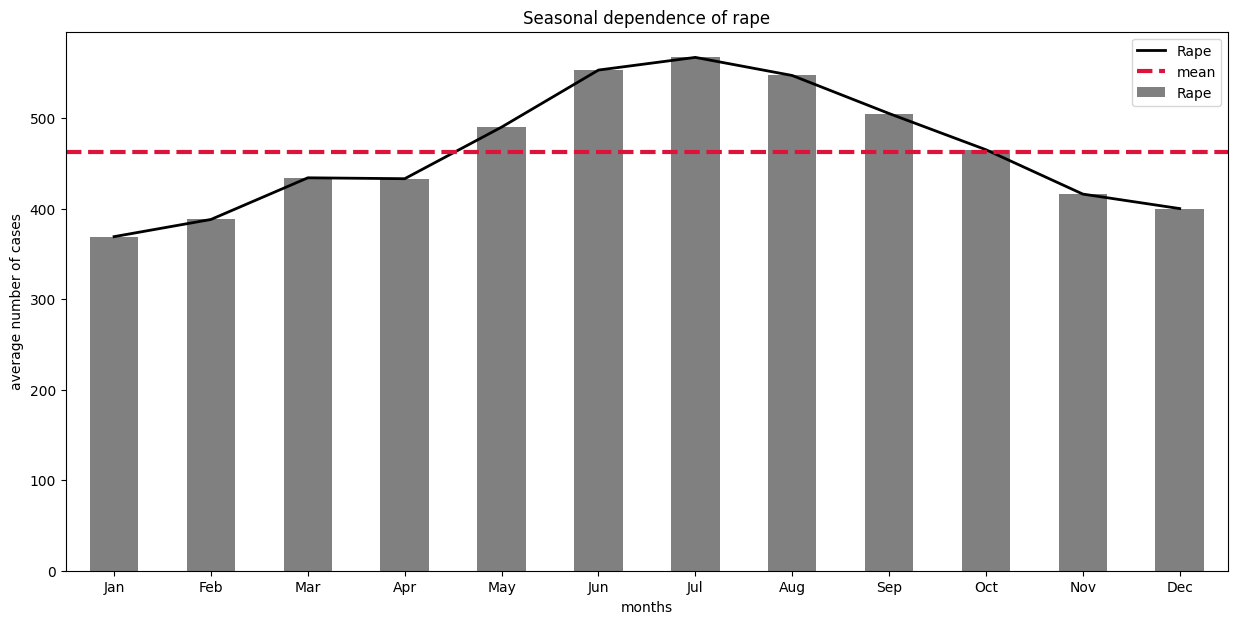

In [150]:
df_for_hypothesis.plot.bar(figsize=(15,7), color="gray", rot=0, xlabel="months", title="Seasonal dependence of rape")
df_for_hypothesis.plot(figsize=(15,7), color="black", linewidth=2, rot=0, xlabel="months", ylabel="average number of cases")
plt.axhline(y = mean, color="crimson", label="mean", linewidth=3, ls="--")
plt.legend()

The hypothesis seems to be true: the amount of cases of rape in average for each month of the year increases from January to July (with an exception of April being slightly lower than March (*)) and decreases from July to December. The biggest figure is in July and the lowest is in January. Higher than mean are months from May to October(**).

In [151]:
#*
int(df_for_hypothesis.Apr), int(df_for_hypothesis.Mar)

(433, 434)

In [152]:
#** October and mean
int(df_for_hypothesis.Oct), mean

(465, 463)

Pie chart:

<Axes: title={'center': 'Seasonal distribution of rape'}>

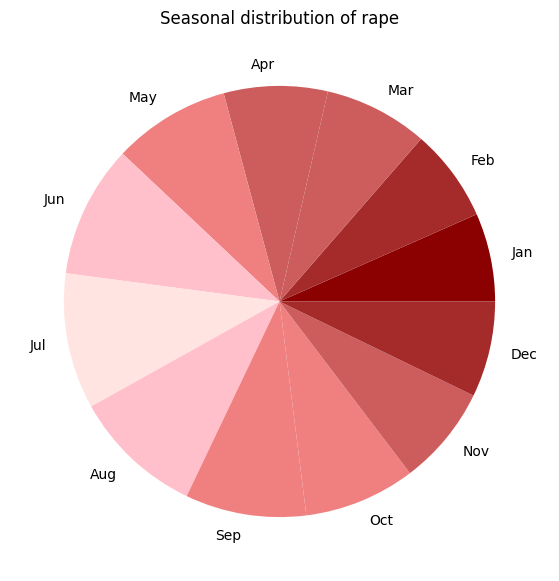

In [153]:
# different color for the highest/the lowest, then colors for 2 around it, then depending on higher/lower than mean.
df_for_hypothesis.plot.pie(figsize=(15,7), colors=["darkred", "brown", "indianred", "indianred", "lightcoral", "pink", "mistyrose", "pink", "lightcoral", "lightcoral", "indianred", "brown"], title="Seasonal distribution of rape", ylabel="")

So, the closer the month to winter the less rape committed (small exception: in April slightly less. Then, if we assume that the middle month of the coldest / the warmest season is the coldest / the warmest, the colder the weather the less rape committed.

So, the hypothesis was proved to be generally true, though with exception for some years and for the difference between March and April.

Another hypothesis concerning seasonal fluctuations: the highest number of cases of murder is on the first of January, so, speaking for months, in January:

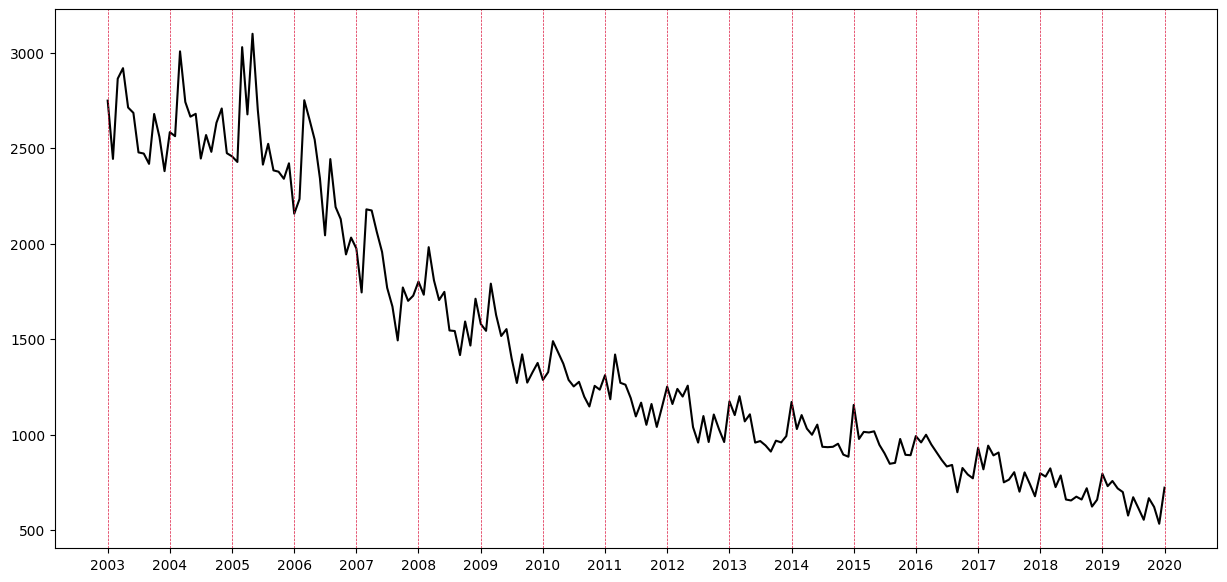

In [154]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 7)
ax.plot(df["month"], df["Murder"], color="black")
ax.xaxis.set_major_locator(mdates.YearLocator())
for i in range(0, 205, 12):
    ax.axvline(x=df.month[i], ymin=0, ymax=1, color="crimson", linewidth=0.5, ls="--")

Generally the beginning of the year has higher rates than the end. It partially correlates with an overall downward trend, but after a drop in the middle of the year or closer to its end, the numbers rise again, so the described tendency cannot be a result of only the general decsrease.

In [155]:
df_for_hypothesis2 = df_seasonal["Murder"] // (2019-2003+1)
df_for_hypothesis2

month_only
Jan    1539.0
Feb    1456.0
Mar    1682.0
Apr    1582.0
May    1566.0
Jun    1470.0
Jul    1361.0
Aug    1394.0
Sep    1314.0
Oct    1399.0
Nov    1347.0
Dec    1345.0
Name: Murder, dtype: float64

In [156]:
mean2 = int(df_for_hypothesis2.mean())
mean2

1454

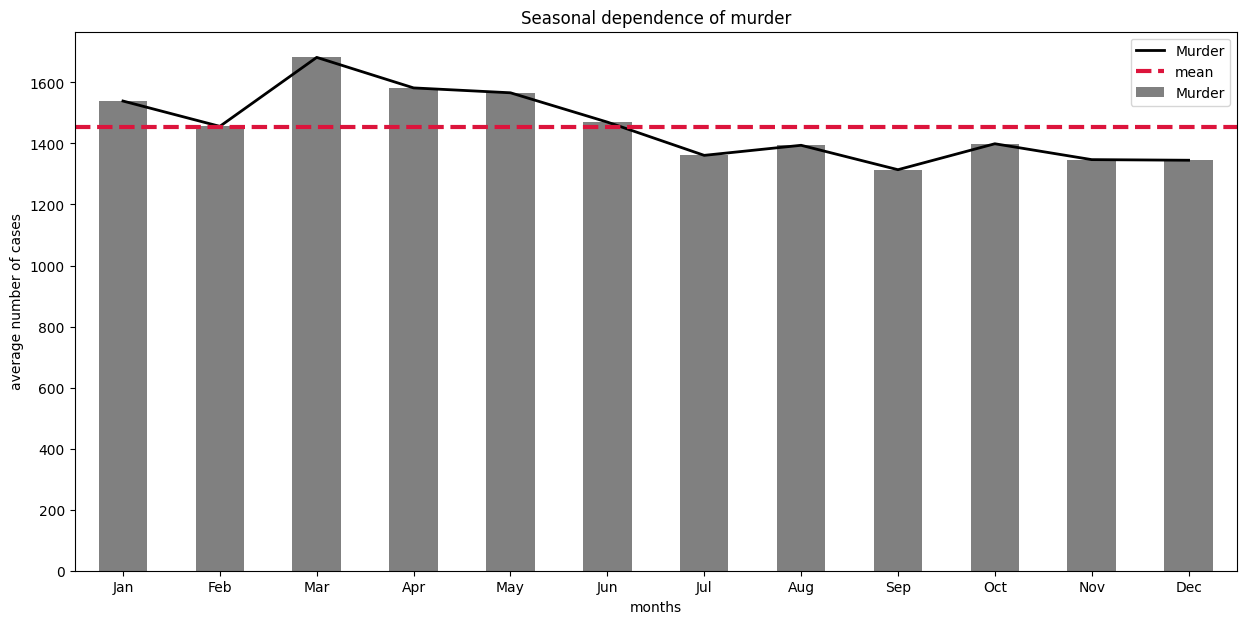

In [157]:
df_for_hypothesis2.plot.bar(figsize=(15,7), color="gray", rot=0, xlabel="months", title="Seasonal dependence of murder")
df_for_hypothesis2.plot(figsize=(15,7), color="black", linewidth=2, rot=0, xlabel="months", ylabel="average number of cases")
plt.axhline(y = mean2, color="crimson", label="mean", linewidth=3, ls="--")
plt.legend()

The highest are columns for spring months and January. Overall, the second part of the year has lower number of cases than the first, as the second is lower than the mean and the first is higher. So there is on average less murder after June. 
So, as the trend for a year on average corresponds with the general downward trend of murder from 2003 to 2019, the results cannot clearly imply seasonal dependency such as higher in the frist part of the year and lower in the second. At the same time, I think that the hypothesis can be considered partially true: the conclusion from the bar chart is that the highest number of cases of murder of the year happen in January and in spring (the highest is in March).

Conclusion:

The tendencies in the amount of crimes of various types committed from 2003 to 2019 (January of 2020) can be divided into two categories: over time and seasonal. Firstly, about the first category. The overall crime rate was down from from 2003 to 2019 but with a peak in 2006. Not all crimes follow the same trend, for example, there was a rise in fraud. The amount of cases of serious crimes decreased more than the amount of crimes on the whole, from being higher to being lower than them. Secondly, I tried to analyse two types of crimes for seasonal dependency (having set two hypothesis). On average, more rape was committed in summer than in winter: the closer the month was to January (from July), the more rape was committed on average during that month. Concerning murder, in my opinion, it is more difficult to say what is its month dependent tendency and what follows from its overall drop. However, statistically more murder was on average committed in spring and January.